
## **In this practice we will use natural language processing to build a spam classifier**
## **We will make use of the sms spam classification data for the implementation**

## **Data processing**
1. Import the libraries needed
2. Load the data from the link 
3. Extract the data from HTML
4. Convert text to tokens

## **Using NLP**
1. Remove stop words from the text
2. Get a list of all words after removing stop words
3. Analysing word frequency and plot the graph


## **Import the libraries needed**

In [ ]:
#import the required packages
import requests
from bs4 import BeautifulSoup
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

## **Load dataset from the link**

In [2]:
#get the dataset from link
dataset='https://www.gutenberg.org/files/1661/1661-h/1661-h.htm'
reading=requests.get(dataset)


## **Extract text from HTML**

In [3]:
html=reading.text

In [4]:
#extract the text using web scraping tool
data=BeautifulSoup(html,"html5lib")

In [5]:
data.title

<title>The Adventures of Sherlock Holmes, by Arthur Conan Doyle</title>

In [10]:
data.findAll('a')[:12]

[<a href="https://www.gutenberg.org/ebooks/48320">
 [ #48320 ]</a>,
 <a href="#chap01">A Scandal in Bohemia</a>,
 <a href="#chap02">The Red-Headed League</a>,
 <a href="#chap03">A Case of Identity</a>,
 <a href="#chap04">The Boscombe Valley Mystery</a>,
 <a href="#chap05">The Five Orange Pips</a>,
 <a href="#chap06">The Man with the Twisted Lip</a>,
 <a href="#chap07">The Adventure of the Blue Carbuncle</a>,
 <a href="#chap08">The Adventure of the Speckled Band</a>,
 <a href="#chap09">The Adventure of the Engineer’s Thumb</a>,
 <a href="#chap10">The Adventure of the Noble Bachelor</a>,
 <a href="#chap11">The Adventure of the Beryl Coronet</a>]

## **Convert text into tokens**

In [12]:
#tokenize the text with regular expressions
text=data.get_text()
token=re.findall('\w+',text)
token[:10]

['The',
 'Adventures',
 'of',
 'Sherlock',
 'Holmes',
 'by',
 'Arthur',
 'Conan',
 'Doyle',
 'body']

In [15]:
words=[]
for word in token:
  words.append(word.lower())
words[:8]

['the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan']

## **Remove all the stopwords**

In [20]:
#download the package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
#remove stop words
sw=nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

## **Get a list of words without stop words**

In [22]:
#get the list without stop words
words_ne=[]
for word in words:
  if word not in sw:
    words_ne.append(word)

words_ne[:5]

['adventures', 'sherlock', 'holmes', 'arthur', 'conan']

## **Plot the word frequency**

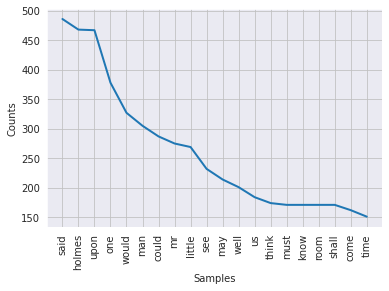

In [23]:
#plot the word frequency
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(words_ne)
nlp_words.plot(20)